In [1]:
from processing import read_data, transform_labels
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

assert sns.__version__ == '0.11.1', "Please upgrade Seaborn to the latest version!"

# Plots that visualize the binary classification

In [2]:
df = read_data()
TARGET = ['process ID']
FEATURES = df.drop(['event weight', 'event ID', 'process ID'], axis=1).columns.to_list() 

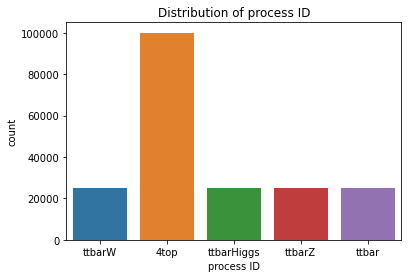

In [32]:
sns.countplot(df['process ID'])
plt.title("Distribution of process ID")
# plt.show()
plt.savefig('foo.png')

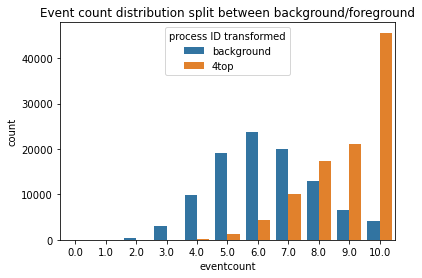

In [7]:
df['eventcount'] = [10-x/5 for x in df.isnull().sum(axis=1).tolist()]
df['process ID transformed'] = transform_labels(df['process ID'])
sns.countplot(df['eventcount'], hue=df['process ID transformed'])
plt.title("Event count distribution split between background/foreground")
df.drop(['eventcount', 'process ID transformed'], axis=1, inplace=True)
plt.show()

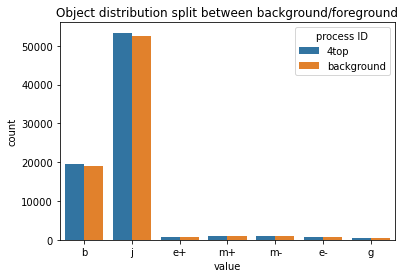

In [8]:
object_columns = [f'obj{x}' for x in range(1, 11, 1)] 
df2 = df.sample(n=20000, random_state=1)
IDS = transform_labels([x for x in df2['process ID'] for y in range(1,11,1)])
df3 = pd.melt(df2[object_columns])
df3['process ID'] = IDS
sns.countplot(df3['value'], hue=df3['process ID'])
plt.title("Object distribution split between background/foreground")
plt.show()

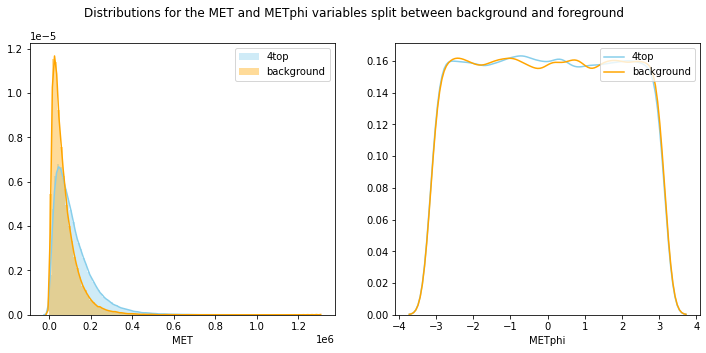

In [10]:
fig, ax = plt.subplots(1,2, figsize=(12,5), sharex=False)
sns.distplot(df.loc[df['process ID']=='4top']['MET'], hist=True, color='skyblue', label='4top', ax=ax[0], bins=100)
sns.distplot(df.loc[df['process ID']!='4top']['MET'], hist=True, color='orange', label='background', ax=ax[0], bins=100)
sns.distplot(df.loc[df['process ID']=='4top']['METphi'], hist=False, color='skyblue', label='4top', ax=ax[1], bins=100)
sns.distplot(df.loc[df['process ID']!='4top']['METphi'], hist=False, color='orange', label='background', ax=ax[1], bins=100)
ax[0].legend()
ax[1].legend(loc='upper right')
fig.suptitle('Distributions for the MET and METphi variables split between background and foreground')
plt.show()

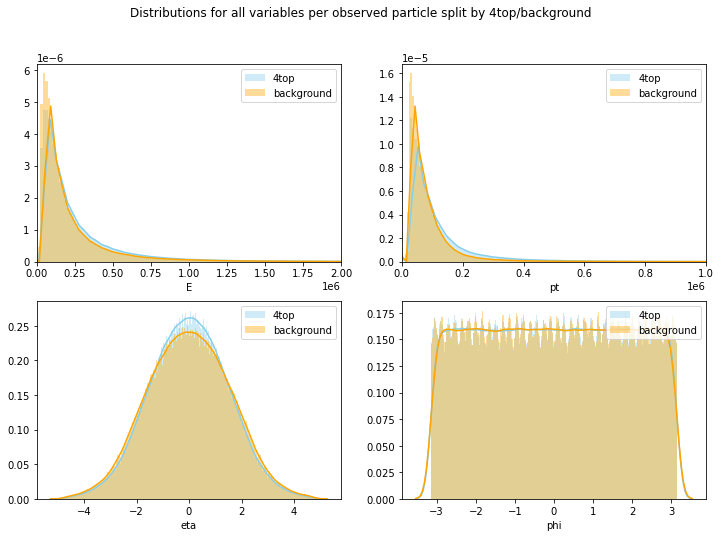

In [11]:
fig, ax = plt.subplots(2,2, figsize=(12,8), sharex=False)
sns.distplot(df.loc[df['process ID']=='4top'][[f'E{x}' for x in range(1,11,1)]], hist=True, color='skyblue', label='4top', ax=ax[0][0], bins=300)
sns.distplot(df.loc[df['process ID']!='4top'][[f'E{x}' for x in range(1,11,1)]], hist=True, color='orange', label='background', ax=ax[0][0], bins=300)
sns.distplot(df.loc[df['process ID']=='4top'][[f'pt{x}' for x in range(1,11,1)]], hist=True, color='skyblue', label='4top', ax=ax[0][1], bins=300)
sns.distplot(df.loc[df['process ID']!='4top'][[f'pt{x}' for x in range(1,11,1)]], hist=True, color='orange', label='background', ax=ax[0][1], bins=300)
sns.distplot(df.loc[df['process ID']=='4top'][[f'eta{x}' for x in range(1,11,1)]], hist=True, color='skyblue', label='4top', ax=ax[1][0], bins=300)
sns.distplot(df.loc[df['process ID']!='4top'][[f'eta{x}' for x in range(1,11,1)]], hist=True, color='orange', label='background', ax=ax[1][0], bins=300)
sns.distplot(df.loc[df['process ID']=='4top'][[f'phi{x}' for x in range(1,11,1)]], hist=True, color='skyblue', label='4top', ax=ax[1][1], bins=300)
sns.distplot(df.loc[df['process ID']!='4top'][[f'phi{x}' for x in range(1,11,1)]], hist=True, color='orange', label='background', ax=ax[1][1], bins=300)
ax[0][0].set(xlabel='E', xlim=(-1, 2*1e6))
ax[0][1].set(xlabel='pt', xlim=(-1, 1*1e6))
ax[1][0].set(xlabel='eta')
ax[1][1].set(xlabel='phi')
ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend(loc='upper right')
fig.suptitle('Distributions for all variables per observed particle split by 4top/background')
plt.show()

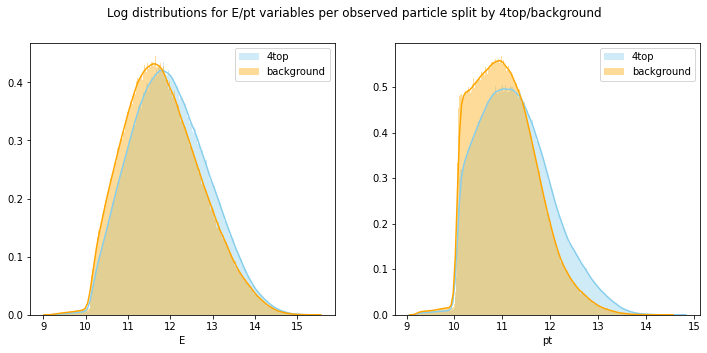

In [14]:
fig, ax = plt.subplots(1,2, figsize=(12,5), sharex=False)
sns.distplot(np.log(df.loc[df['process ID']=='4top'][[f'E{x}' for x in range(1,11,1)]].astype(float)), hist=True, color='skyblue', label='4top', ax=ax[0], bins=300)
sns.distplot(np.log(df.loc[df['process ID']!='4top'][[f'E{x}' for x in range(1,11,1)]].astype(float)), hist=True, color='orange', label='background', ax=ax[0], bins=300)
sns.distplot(np.log(df.loc[df['process ID']=='4top'][[f'pt{x}' for x in range(1,11,1)]].astype(float)), hist=True, color='skyblue', label='4top', ax=ax[1], bins=300)
sns.distplot(np.log(df.loc[df['process ID']!='4top'][[f'pt{x}' for x in range(1,11,1)]].astype(float)), hist=True, color='orange', label='background', ax=ax[1], bins=300)
ax[0].set_xlabel('E')
ax[1].set_xlabel('pt')
ax[0].legend()
ax[1].legend()
fig.suptitle('Log distributions for E/pt variables per observed particle split by 4top/background')
plt.show()

C:\Users\Cyril de Kock\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Cyril de Kock\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Cyril de Kock\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

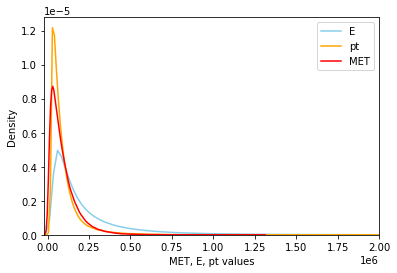

In [3]:
sns.distplot(df[[f'E{x}' for x in range(1,11,1)]], hist=False, color='skyblue', label='E', bins=300)
sns.distplot(df[[f'pt{x}' for x in range(1,11,1)]], hist=False, color='orange', label='pt', bins=300)
sns.distplot(df['MET'], hist=False, color='r', label='MET', bins=300)
plt.xlim((-20000, 2*1e6))
plt.xlabel('MET, E, pt values')
plt.ylabel('Density')
plt.legend()
plt.show()

C:\Users\Cyril de Kock\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Cyril de Kock\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Cyril de Kock\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

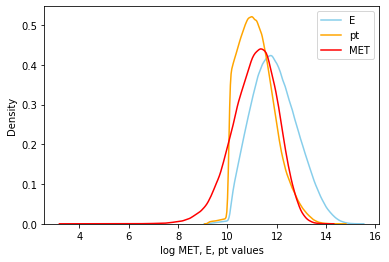

In [6]:
sns.distplot(np.log(df[[f'E{x}' for x in range(1,11,1)]].astype(float)), hist=False, color='skyblue', label='E', bins=300)
sns.distplot(np.log(df[[f'pt{x}' for x in range(1,11,1)]].astype(float)), hist=False, color='orange', label='pt', bins=300)
sns.distplot(np.log(df['MET'].astype(float)), hist=False, color='r', label='MET', bins=300)
#plt.xlim((-20000, 2*1e6))
plt.xlabel('log MET, E, pt values')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plots that visualize the multiclass classification

In [3]:
df = read_data()
TARGET = ['process ID']
FEATURES = df.drop(['event weight', 'event ID', 'process ID'], axis=1).columns.to_list() 
LABELS =['4top', 'ttbar', 'ttbarHiggs', 'ttbarW', 'ttbarZ']
df = df.groupby("process ID").apply(lambda x: x.sample(n=25000)).reset_index(drop = True)

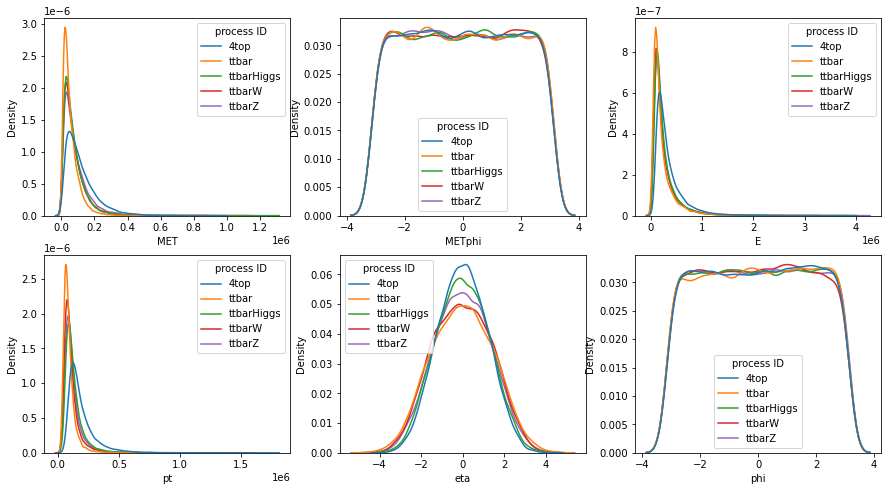

In [4]:
fig, ax = plt.subplots(2,3, figsize=(15,8), sharex=False)
sns.kdeplot(df['MET'], hue=df['process ID'], fill=False, ax=ax[0][0])
sns.kdeplot(df['METphi'], hue=df['process ID'], fill=False, ax=ax[0][1])
sns.kdeplot(df['E2'].astype(float), hue=df['process ID'], fill=False, ax=ax[0][2])
sns.kdeplot(df[f'pt2'].astype(float), hue=df['process ID'], fill=False, ax=ax[1][0])
sns.kdeplot(df['eta2'].astype(float), hue=df['process ID'], fill=False, ax=ax[1][1])
sns.kdeplot(df[f'phi2'].astype(float), hue=df['process ID'], fill=False, ax=ax[1][2])

ax[0][2].set_xlabel('E')
ax[1][0].set_xlabel('pt')
ax[1][1].set_xlabel('eta')
ax[1][2].set_xlabel('phi')

plt.show()

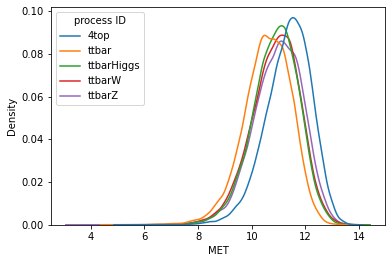

In [5]:
sns.kdeplot(np.log(df['MET'].astype(float)), hue=df['process ID'], fill=False) # , common_norm=True
plt.show()

C:\Users\Cyril de Kock\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


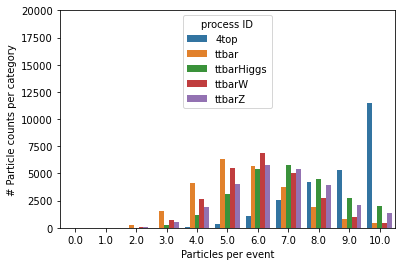

In [6]:
df['eventcount'] = [10-x/5 for x in df.isnull().sum(axis=1).tolist()]
sns.countplot(df['eventcount'], hue=df['process ID'])
plt.ylim(0, 20000)
plt.xlabel('Particles per event')
plt.ylabel('# Particle counts per category')
df.drop(['eventcount'], axis=1, inplace=True)
plt.show()

C:\Users\Cyril de Kock\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


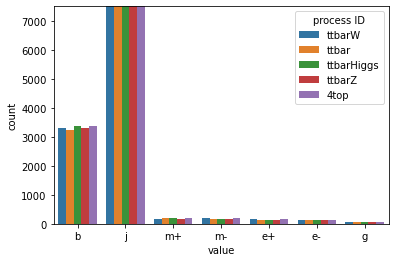

In [7]:
object_columns = [f'obj{x}' for x in range(1, 11, 1)] 
df2 = df.sample(n=10000, random_state=1)
IDS = [x for x in df2['process ID'] for y in range(1,11,1)]
df3 = pd.melt(df2[object_columns])
df3['process ID'] = IDS
sns.countplot(df3['value'], hue=df3['process ID'])
plt.ylim(0, 7500)
plt.show()